## - Exercici 1:

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [ ]:
# Hipótesi nula que les dades procedeixen d'una distribució normal
# Hipótess alternativa les dades NO procedeixen d'una distribució normal

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
from scipy.stats import kendalltau
from scipy.stats import spearmanr

In [3]:
df = pd.read_csv('Lligues europees UEFA.csv', sep = ';', encoding='latin_1')

In [4]:
df.sort_values(by=['Rk'])

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [5]:
#escollim l'atribut punts del dataframe i visualitzem les dades estadístiques del mateix
df['Pts'].describe()

count    98.000000
mean     49.734694
std      16.166371
min      18.000000
25%      37.000000
50%      46.000000
75%      61.750000
max      90.000000
Name: Pts, dtype: float64

In [16]:
# per determinar si la mostra agafada té una distribució normal o no fem la prova de Shapiro-Wilk
scipy.stats.shapiro(df['Pts'])

(0.9720422029495239, 0.0346611924469471)

In [47]:
# el resultat ens dona un valor p de 0.03. donat que l'alfa es de 0.05, rebutjem l'hipotesi nula de que la mostra té una distribució normal.

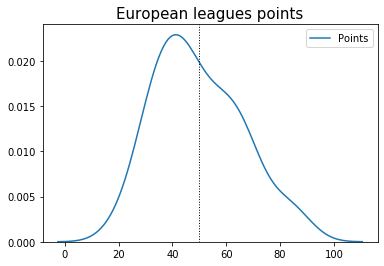

In [19]:
sns.kdeplot(df['Pts'], label= 'Points')
plt.axvline(x= df['Pts'].mean(), linewidth = 1, color= 'black', ls= 'dotted')
plt.title('European leagues points', size = 15)
plt.show()

In [ ]:
# Al gràfic anterior també podem visualitzar la confirmació que la mostra no té una distribució normal.

## - Exercici 2:

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [ ]:
# Hipótesi nula que hi ha una correlació entre les dues variables ranking i punts
# Hipótesi alternativa que NO hi ha cap correlació entre aquestes dues variables

In [20]:
scipy.stats.shapiro(df['Rk'])

(0.9547353386878967, 0.001963241258636117)

In [ ]:
''' Com hem vist a l'exercici anterior la variable punts no té una distribució normal. 
i com comprovem a la linia anterior la variable ranking tampoc té una distribució normal (valor p  de 0.0019 per sota del 0.05) 
Així doncs no podem fer servir la correlació de Pearson, que funciona millor amb variables amb distribucions normals, i
farem servir llavors el coeficient de correlació de Spearman.'''

In [21]:
rho, p_value = spearmanr (df['Pts'], df['Rk'])

In [22]:
print("The Spearman correlation coefficient is:", rho)
print("The p-value is:", p_value)

The Spearman correlation coefficient is: -0.9943014501449078
The p-value is: 3.790984733620942e-95


In [ ]:
''' Veiem que hi ha una correlació negativa entre ambdues variables de -0.99, gairebé perfecte. 
I donat que el valor p (3.398589707355742) es major que 0.05, es confirma que la hipótesis nula es verdadera
i hi ha una forta correlació entre la variable punts i la variable ranking.'''

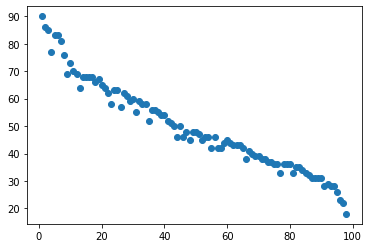

In [50]:
plt.scatter(df['Rk'],df['Pts'])
plt.show()

In [ ]:
# La gràfica anterior ve a confirmar visualment que hi ha correlació practicament perfecte entre les variables escollides.

## - Exercici 3:

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [19]:
df.corr()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
Rk,1.000000,0.988130,0.048452,-0.966555,0.301579,0.924273,-0.855210,0.837186,-0.950350,-0.975809,-0.982258,-0.817633,0.789226,-0.896688,-0.895620,-0.542683
LgRk,0.988130,1.000000,0.077611,-0.952942,0.310066,0.910752,-0.843291,0.826181,-0.937446,-0.959944,-0.968642,-0.795941,0.779205,-0.878232,-0.876824,-0.532435
MP,0.048452,0.077611,1.000000,0.016391,0.251907,0.063785,-0.083514,-0.049424,-0.025317,0.061955,-0.036399,-0.065936,-0.039456,-0.021589,-0.022025,0.032255
W,-0.966555,-0.952942,0.016391,1.000000,-0.438612,-0.869553,0.880804,-0.795596,0.944505,0.986890,0.986395,0.851354,-0.753535,0.900125,0.898715,0.583984
D,0.301579,0.310066,0.251907,-0.438612,1.000000,-0.017991,-0.364518,0.070288,-0.257648,-0.288033,-0.315227,-0.325834,0.072106,-0.238222,-0.241650,-0.243187
L,0.924273,0.910752,0.063785,-0.869553,-0.017991,1.000000,-0.800298,0.841547,-0.919229,-0.929928,-0.936085,-0.785229,0.795575,-0.879614,-0.876187,-0.510045
GF,-0.855210,-0.843291,-0.083514,0.880804,-0.364518,-0.800298,1.000000,-0.585596,0.908890,0.873521,0.886530,0.919444,-0.600808,0.867793,0.871334,0.483135
GA,0.837186,0.826181,-0.049424,-0.795596,0.070288,0.841547,-0.585596,1.000000,-0.870293,-0.835098,-0.828477,-0.592486,0.861637,-0.791906,-0.787094,-0.376617
GD,-0.950350,-0.937446,-0.025317,0.944505,-0.257648,-0.919229,0.908890,-0.870293,1.000000,0.960402,0.964901,0.863488,-0.808352,0.934701,0.934376,0.487320
Pts,-0.975809,-0.959944,0.061955,0.986890,-0.288033,-0.929928,0.873521,-0.835098,0.960402,1.000000,0.994677,0.848167,-0.790710,0.916410,0.914305,0.579261


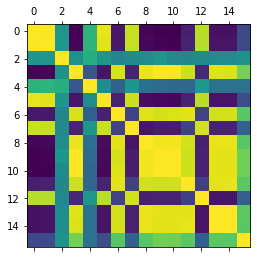

In [20]:
plt.matshow(df.corr())

In [21]:
scipy.stats.pearsonr(df['Rk'], df['MP'])

(0.04845174094109518, 0.6356624921346142)

In [26]:
scipy.stats.pearsonr(df['Pts'], df['MP'])

(0.06195492655552627, 0.5444909703113403)

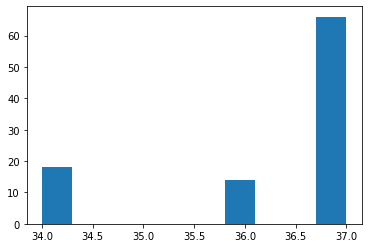

In [27]:
plt.hist(df['MP'])
plt.show()
correlació entre les dues variables

In [44]:
corr, p_valor = kendalltau(df['Pts'], df['MP']) 

In [45]:
print("The pearson correlation coefficient is:", corr)
print("The p-value is:", p_valor)

The pearson correlation coefficient is: 0.011726390387008831
The p-value is: 0.8847668279526313


In [35]:
rho, p_value = spearmanr (df['Pts'], df['MP'])

In [36]:
print("The pearson correlation coefficient is:", rho)
print("The p-value is:", p_value)

The pearson correlation coefficient is: 0.014235507663591758
The p-value is: 0.8893527737080401
